In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load data
credit_card_data=pd.read_csv(r"C:\Users\FAITH\Documents\work\AI\data\creditcard.csv\creditcard.csv")

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#inormation o the dataset
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#checking missing values
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
credit_card_data['Class'].value_counts()
#The distribution o the category shows the data is highly unbalanced

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
#defining the class independently into legit and fraudulent category......0-->Legit transaction, 1-->Fradulent transaction
legit_transaction=credit_card_data[credit_card_data.Class==0]
fraudulent_transaction=credit_card_data[credit_card_data.Class==1]

In [9]:
fraudulent_transaction.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


Time
0.25040691681884886
V1
-1.7921313955133558
V2
1.2228179789510243
V3
-1.510362130741656
V4
0.495229769280999
V5
-1.35698590358671
V6
0.865085969988708
V7
-1.8220227663171338
V8
-2.8213861475153714
V9
-0.9720995887842262
V10
-1.149201886781501
V11
0.4975666341375601
V12
-0.6647948022687559
V13
-0.02591639170273846
V14
-0.2507860694845321
V15
-0.5334337155360666
V16
-0.49375144672458826
V17
-0.4846120535095738
V18
-0.5091262074788608
V19
0.04511041548359373
V20
2.1555955498528854
V21
2.6445219536222577
V22
-1.4955452808570437
V23
-5.373741426798324
V24
-0.44951774248082155
V25
-0.780422040749251
V26
0.5269227403849768
V27
-2.253703846702057
V28
-0.7128654110320044
Amount
3.743020244873463
Class
nan


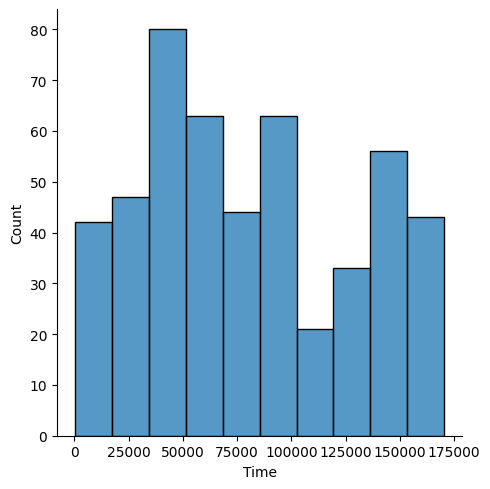

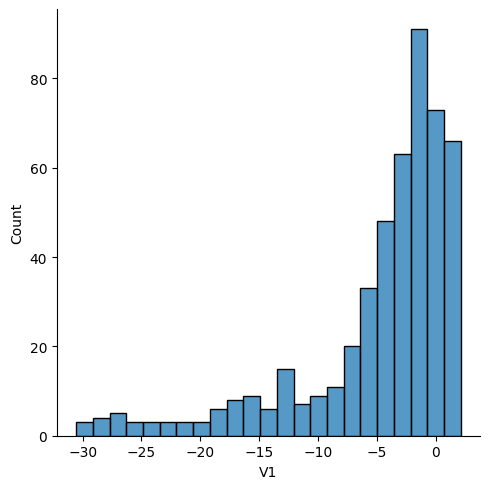

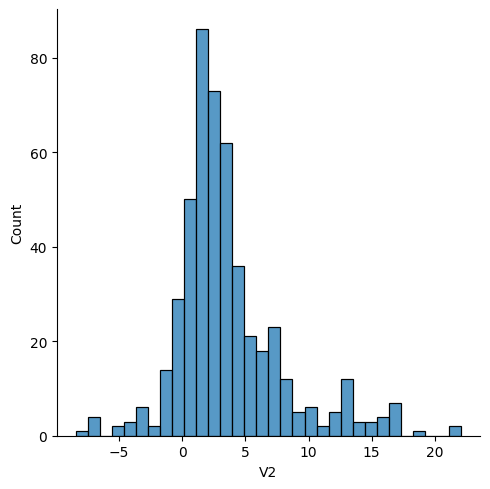

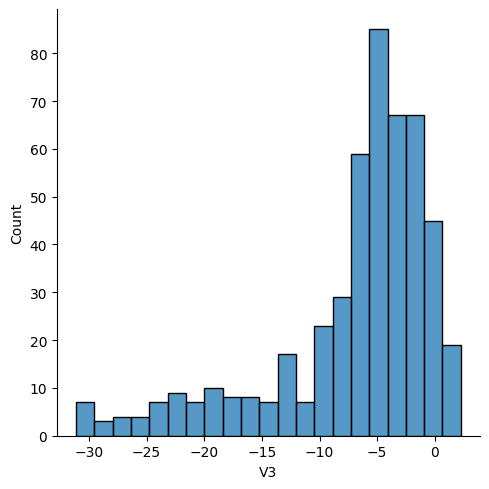

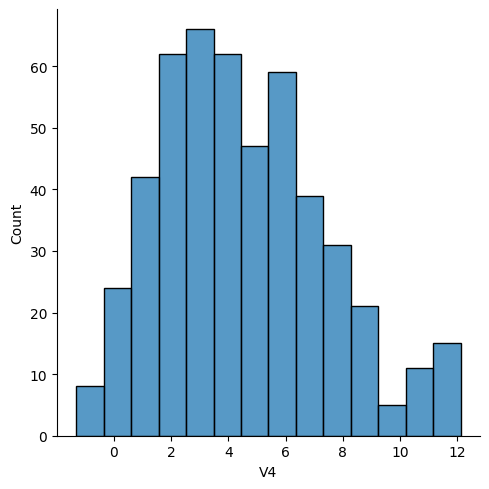

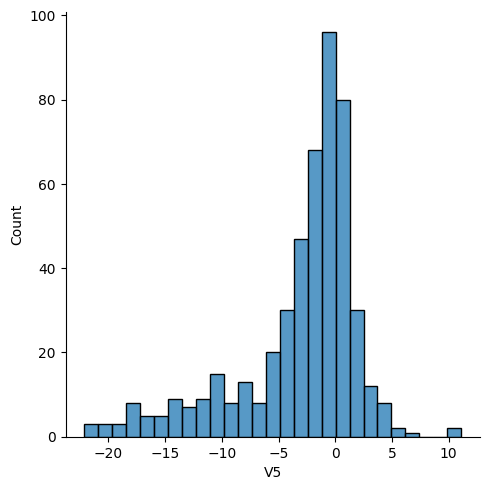

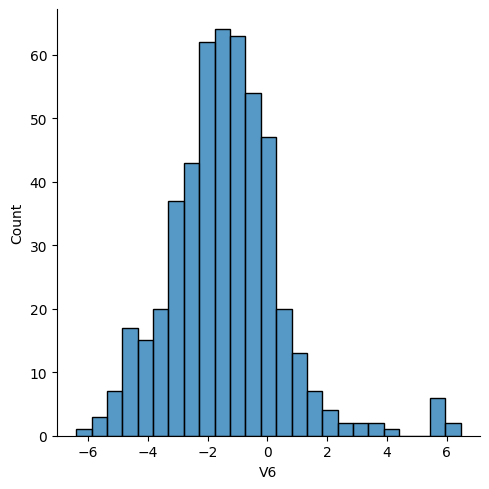

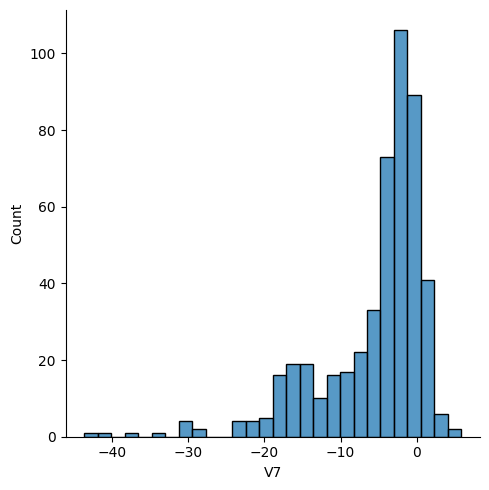

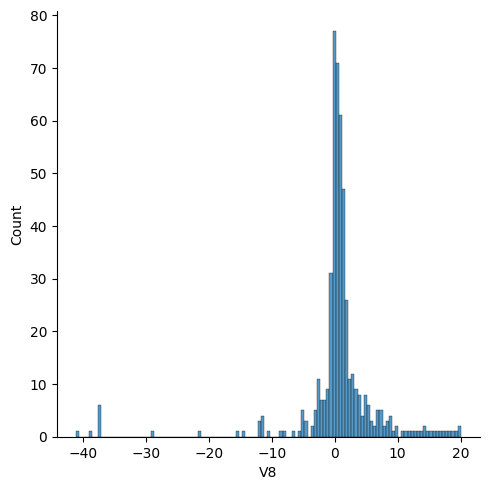

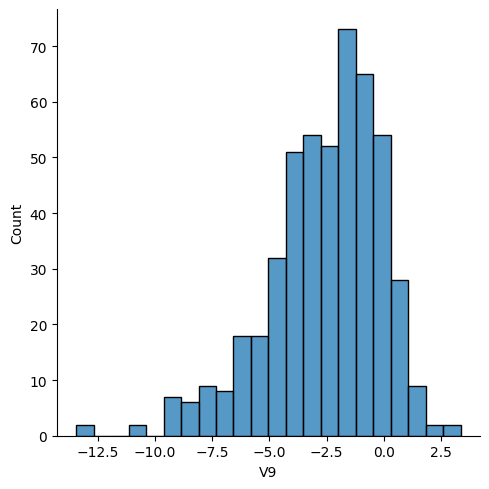

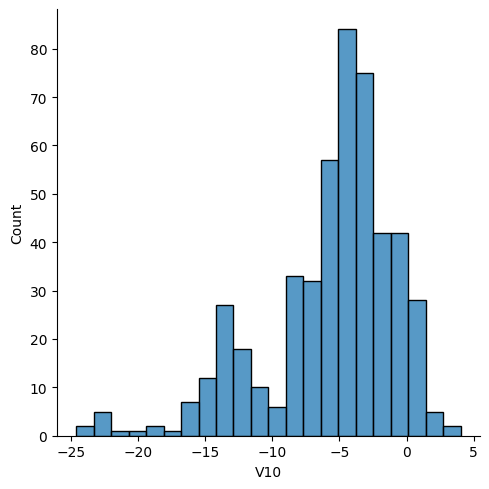

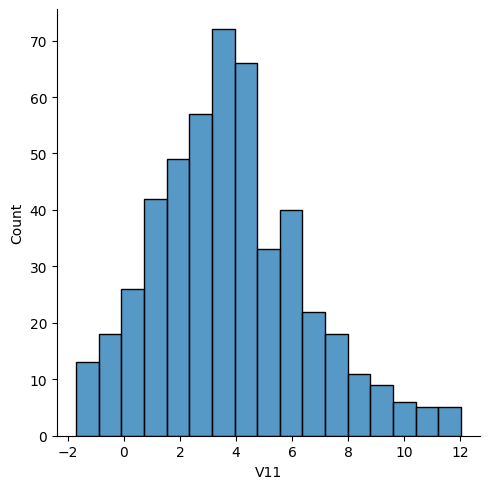

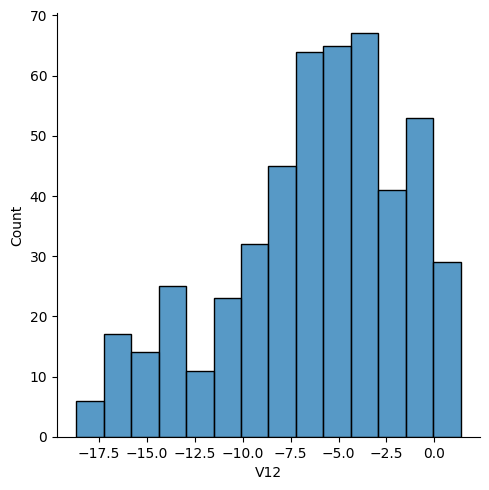

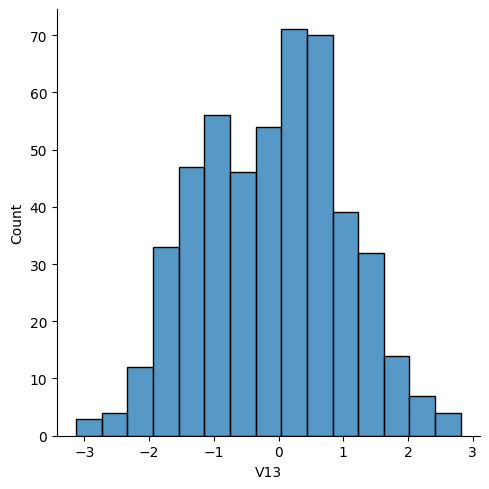

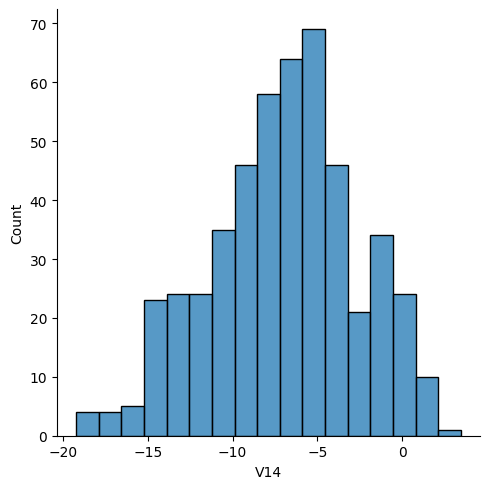

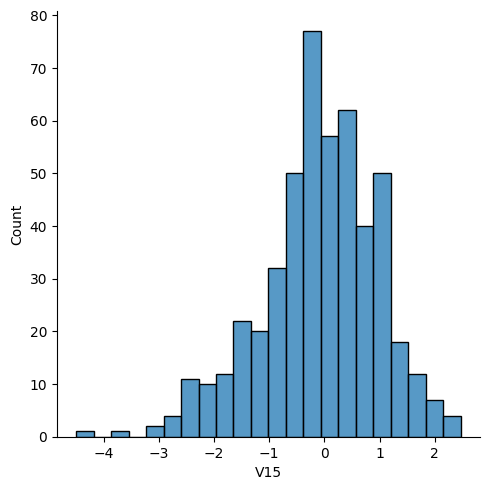

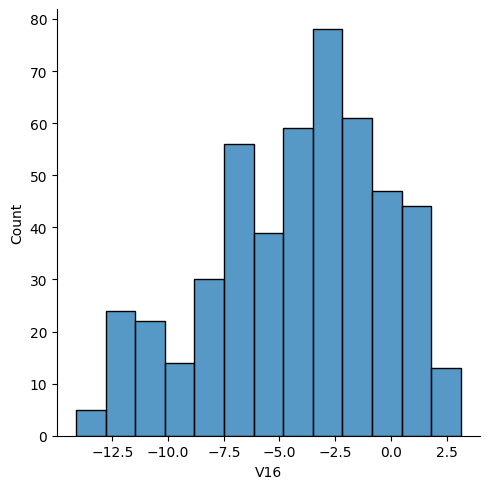

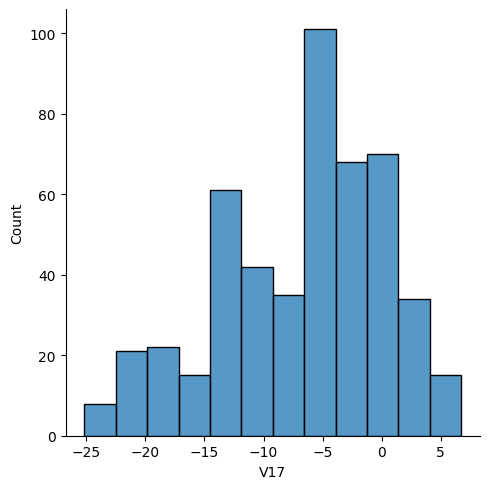

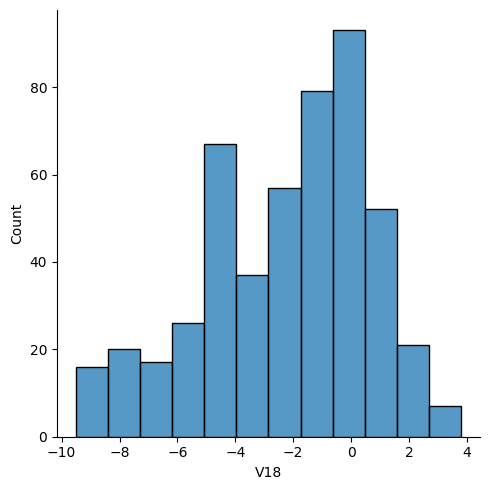

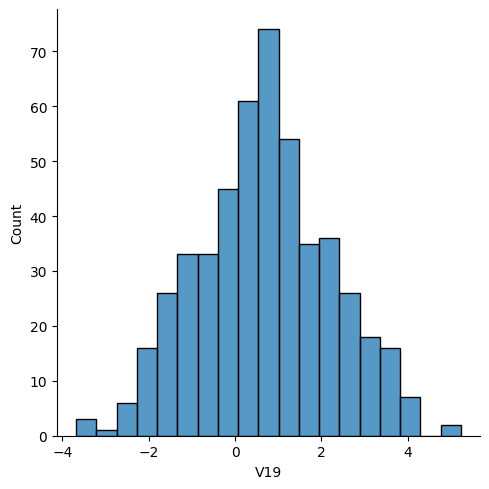

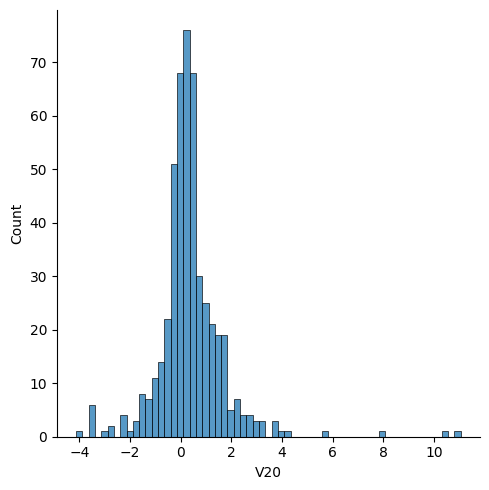

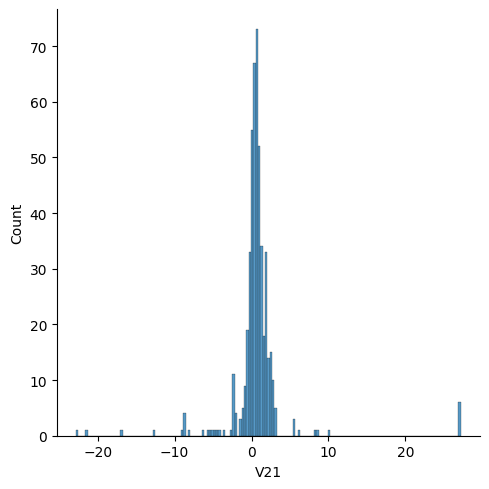

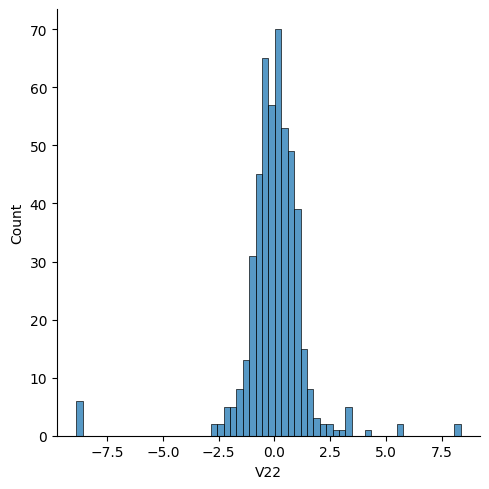

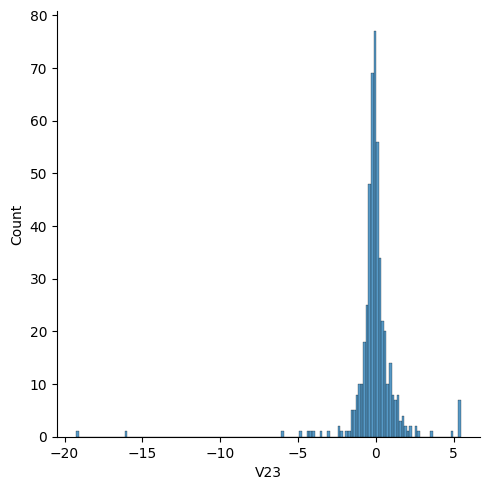

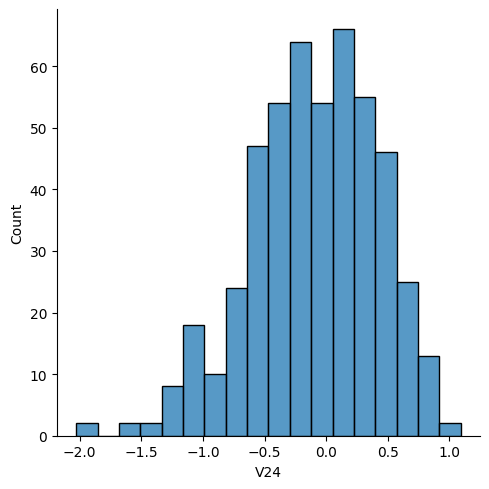

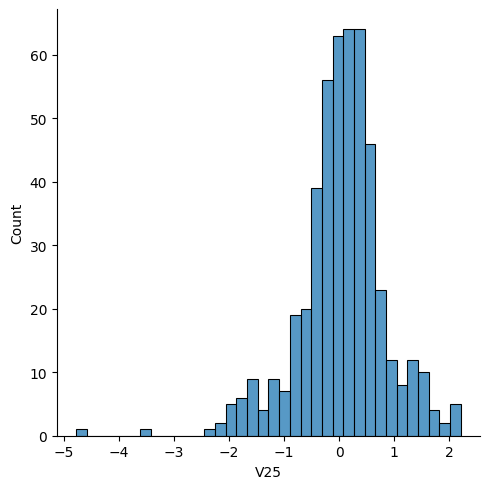

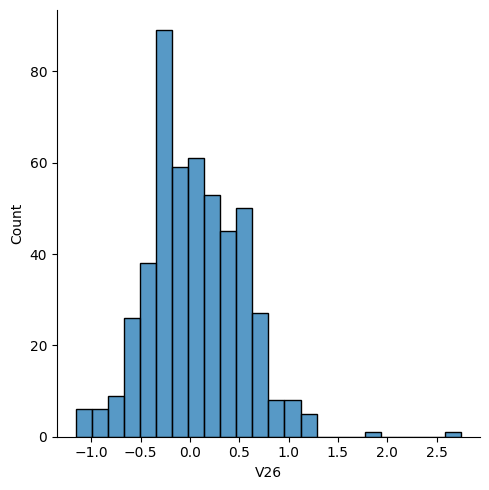

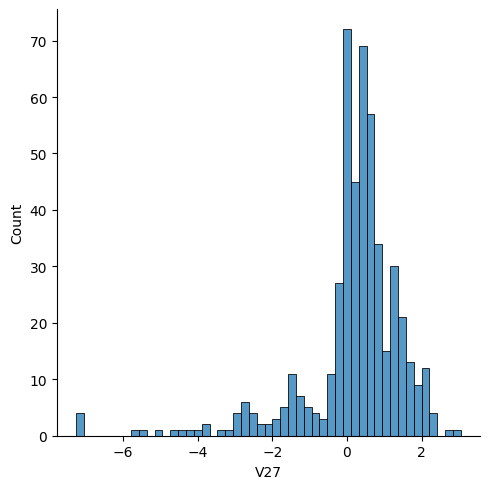

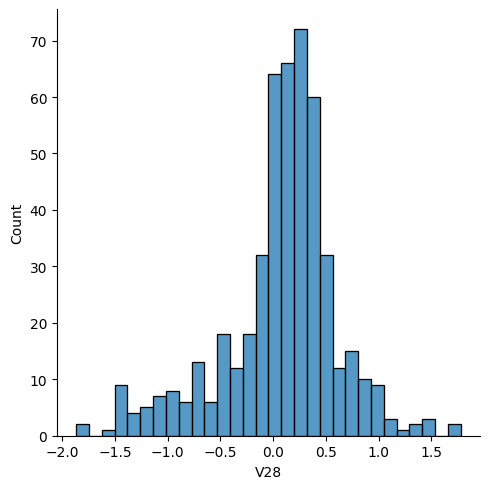

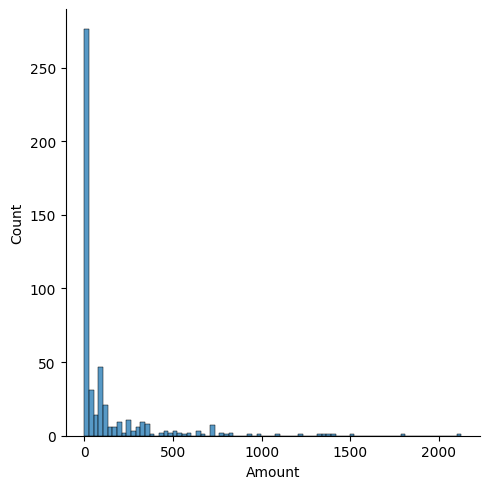

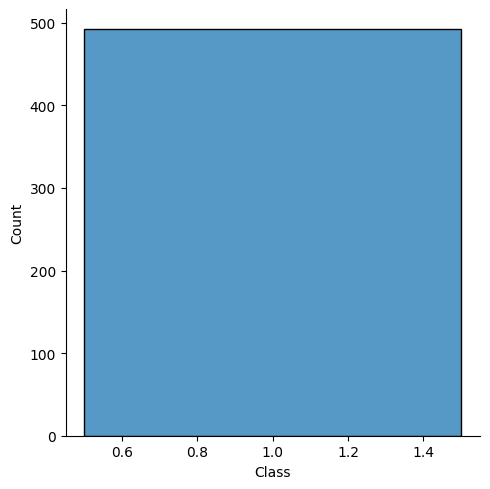

In [10]:
#investigating the distribution of data in fraudulent category
for col in fraudulent_transaction:
    print(col)
    print(skew(fraudulent_transaction[col]))
    plt.figure
    sns.displot(fraudulent_transaction[col])
    plt.show

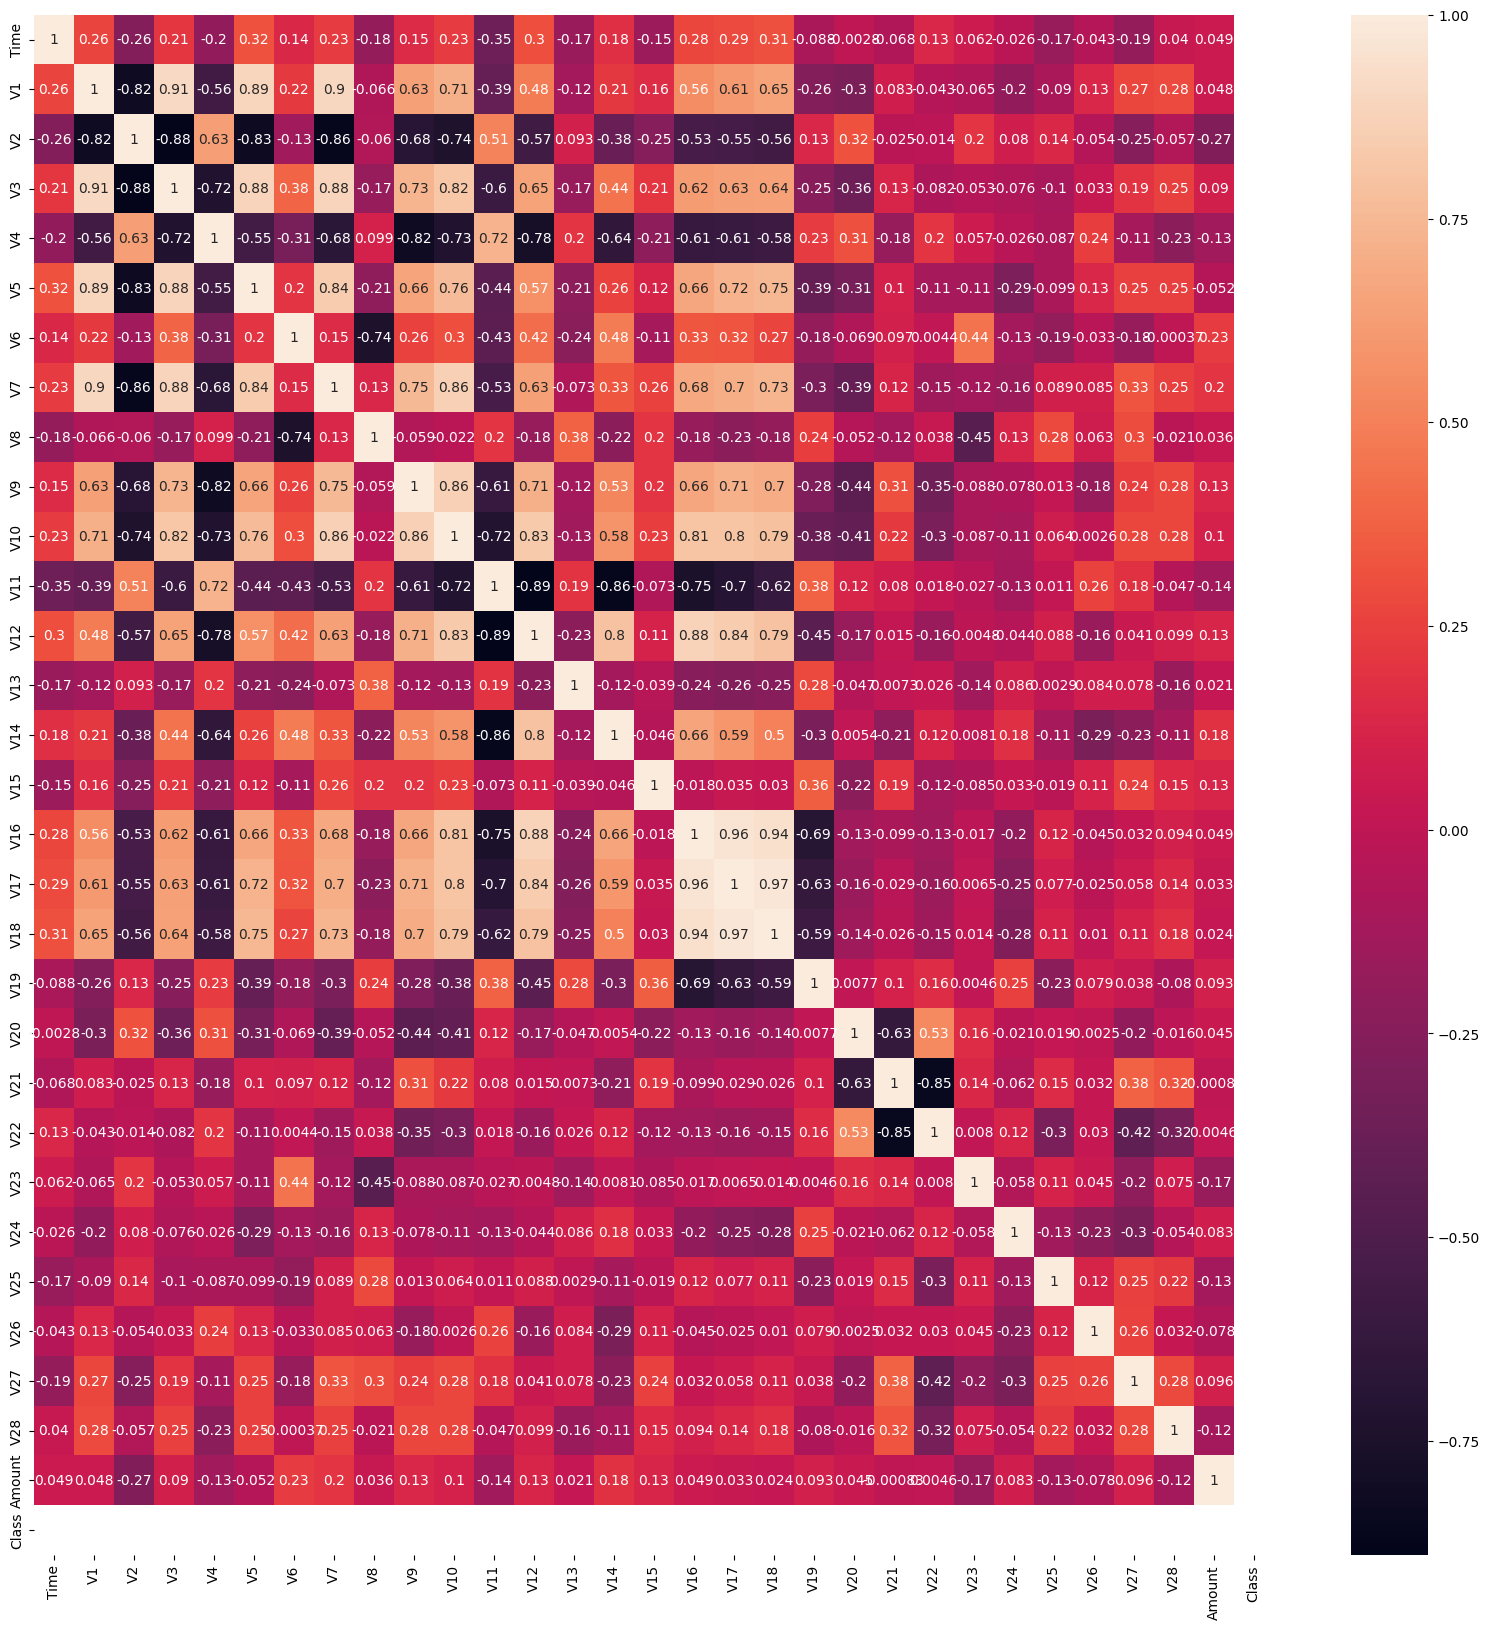

In [14]:
#correlation heatmap

fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(fraudulent_transaction.corr(), annot=True)
plt.show()

In [15]:
fraudulent_transaction['Amount'].skew()

3.7544765273817413

In [16]:
fraudulent_transaction['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
np.sqrt(fraudulent_transaction['Amount'])

541        0.000000
623       23.000000
4920      15.489674
6108       7.681146
6329       1.000000
            ...    
279863    19.748418
280143     0.871780
280149     8.825531
281144    15.652476
281674     6.521503
Name: Amount, Length: 492, dtype: float64

In [18]:
fraudulent_transaction['Amount']=(np.sqrt(fraudulent_transaction['Amount']))

In [19]:
fraudulent_transaction.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,23.000000,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,15.489674,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,7.681146,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.000000,1


In [20]:
fraudulent_transaction['Amount'].describe()

count    492.000000
mean       7.182149
std        8.412604
min        0.000000
25%        1.000000
50%        3.041374
75%       10.290287
max       46.107158
Name: Amount, dtype: float64

In [21]:
fraudulent_transaction.shape

(492, 31)

In [22]:
fraudulent_transaction['Amount'].skew()

1.641102763941526

Time
-0.03601527418606764
V1
-3.130171747665366
V2
-4.887139945176386
V3
-1.453668675575384
V4
0.5811344075820191
V5
-2.2138918046762903
V6
1.8425937997370527
V7
4.747775402532157
V8
-8.39544756702681
V9
0.6656316615954238
V10
2.4222650778369115
V11
0.14553579943258851
V12
-1.2562944127329285
V13
0.06558132884618773
V14
-0.7038533745225957
V15
-0.30765727535821413
V16
-0.43952071472687276
V17
0.224526633661368
V18
-0.03986147234970411
V19
0.09748373284591179
V20
-2.0781023348065326
V21
3.009097443380898
V22
-0.19302938366849454
V23
-5.814565111475744
V24
-0.5528608799277098
V25
-0.4136851251021109
V26
0.5768093896856605
V27
-1.0712423854746262
V28
11.267397437888748
Amount
17.00305739508626
Class
nan


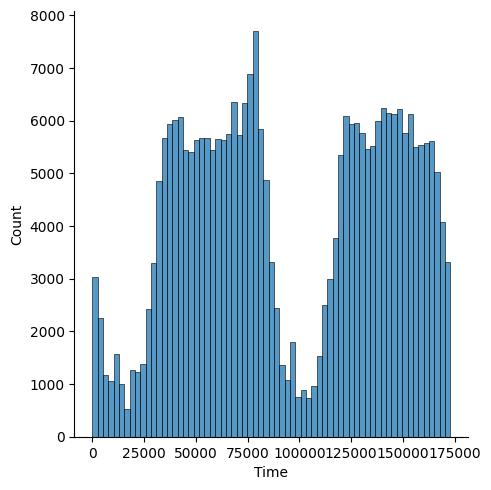

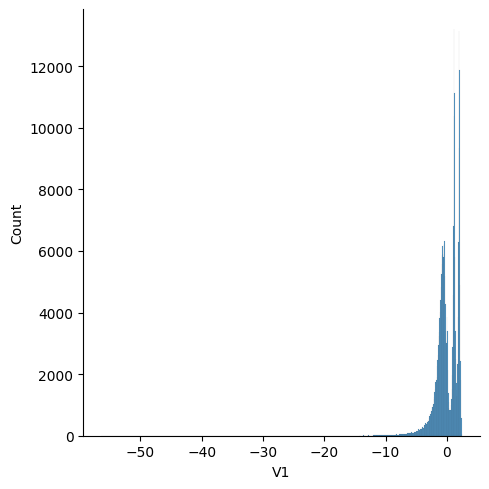

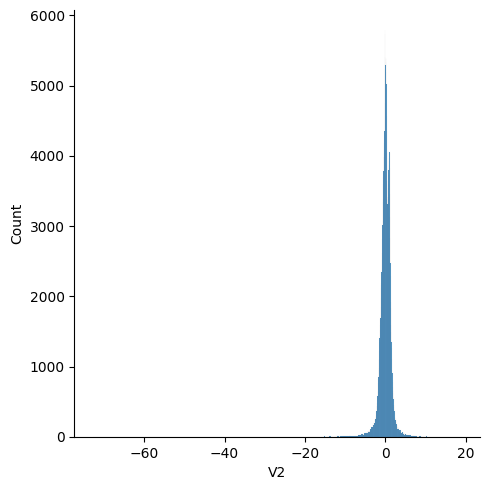

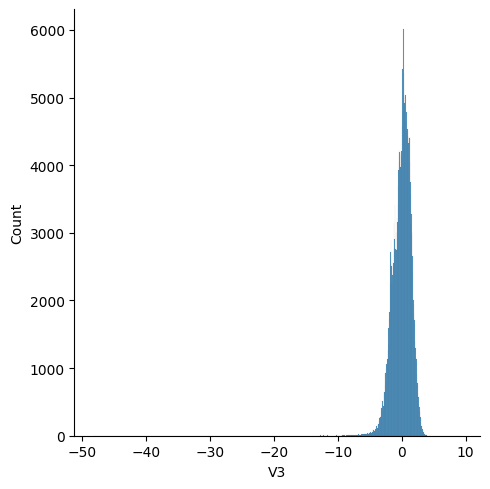

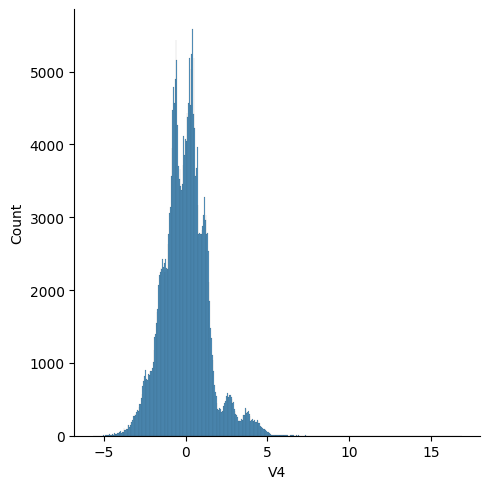

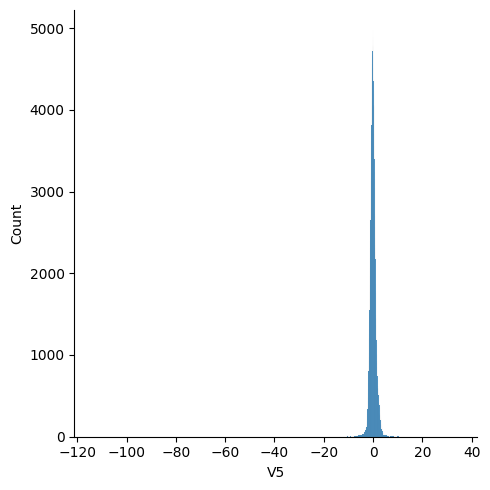

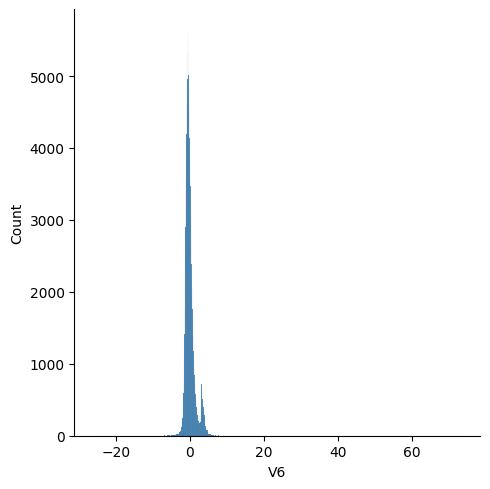

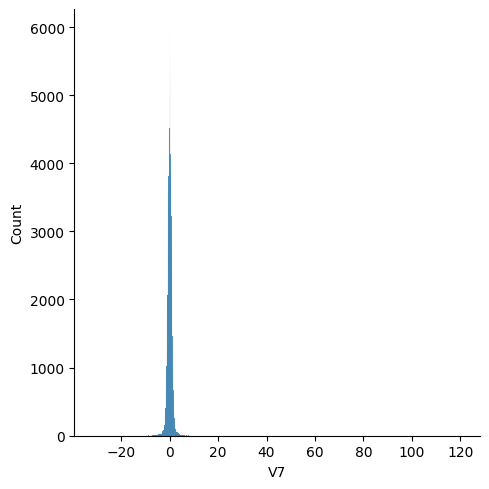

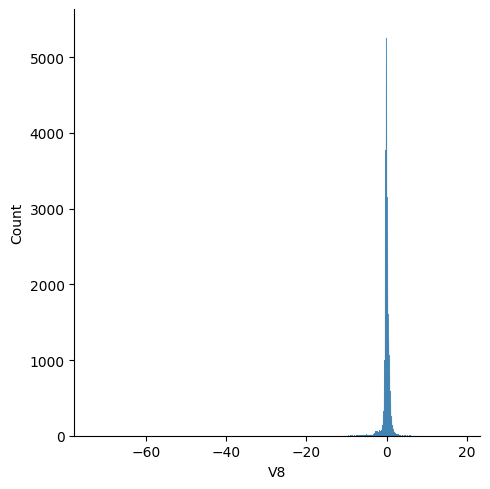

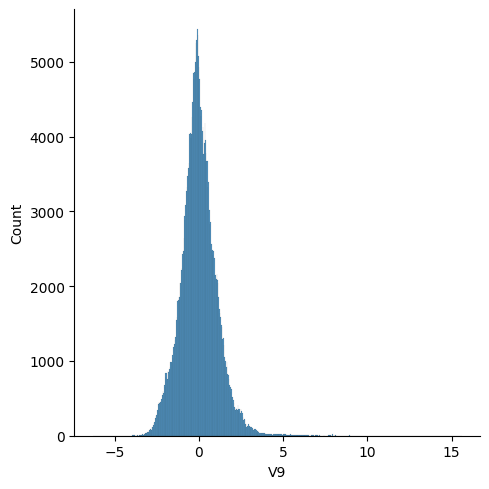

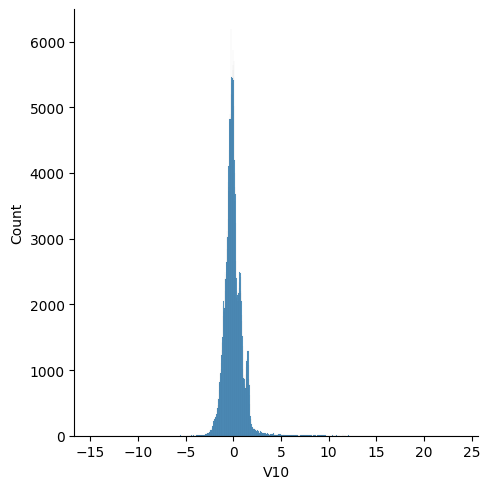

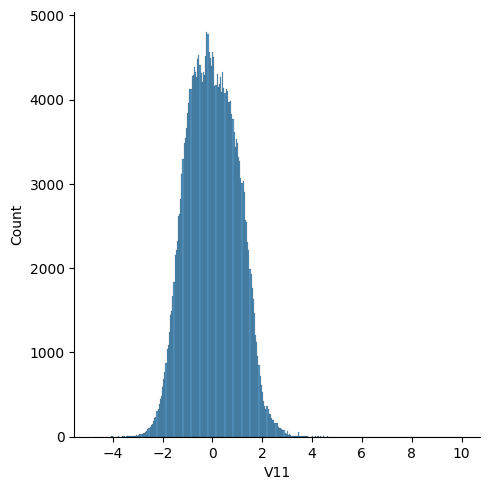

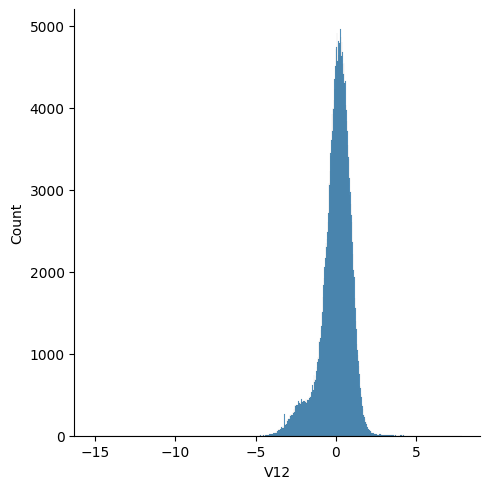

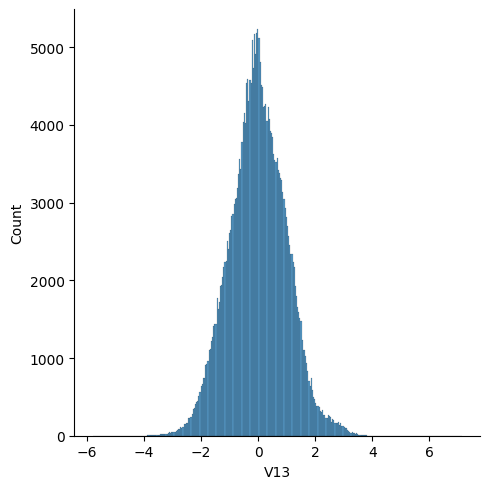

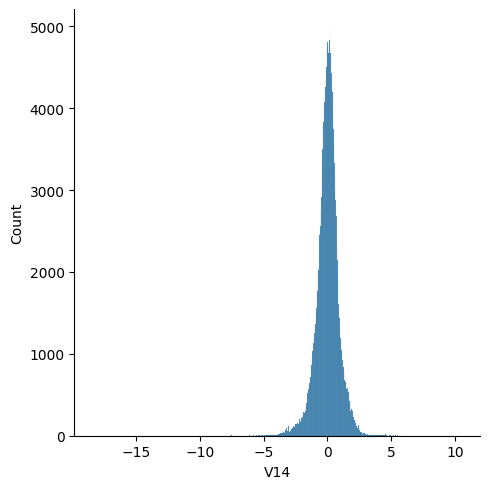

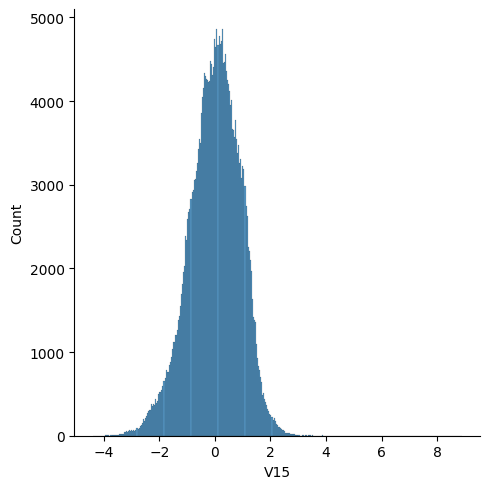

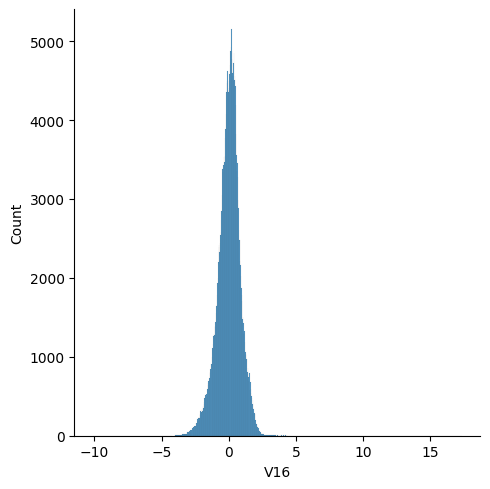

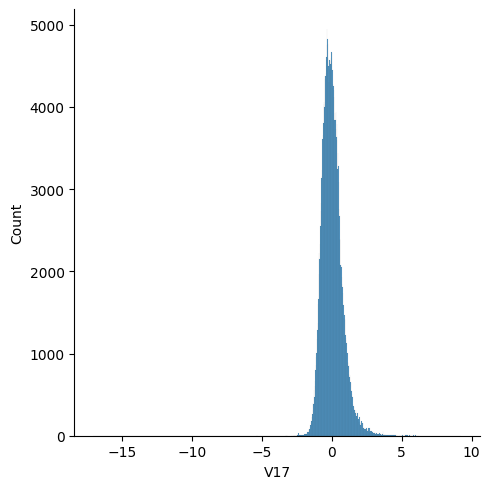

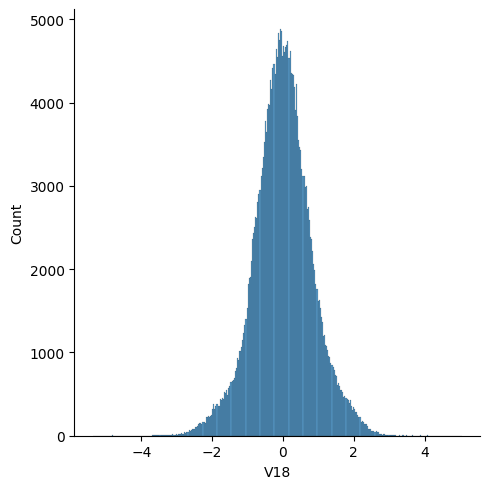

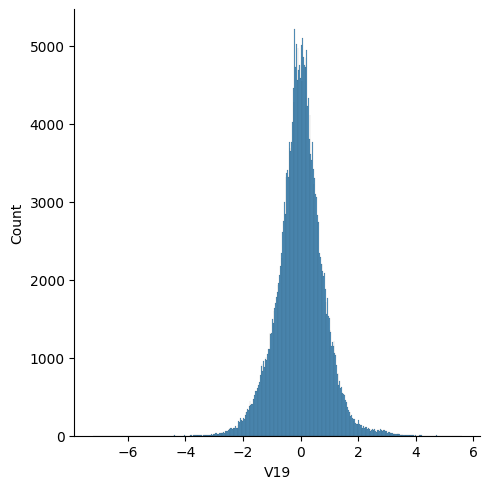

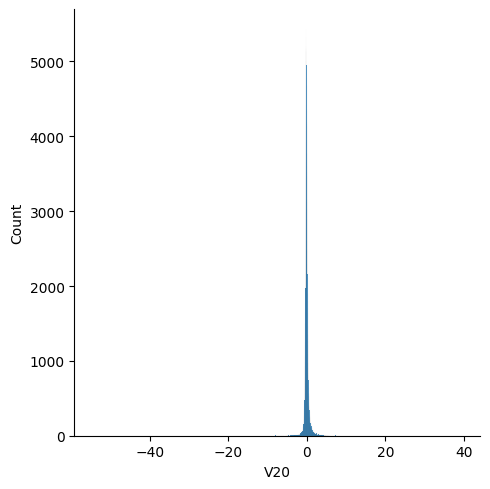

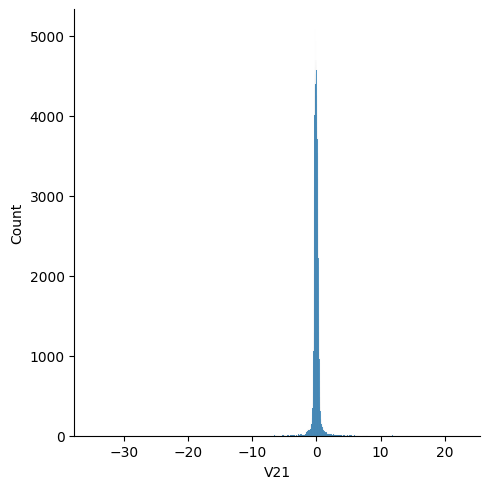

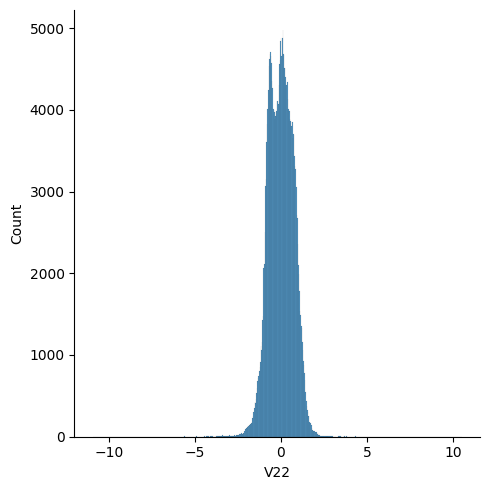

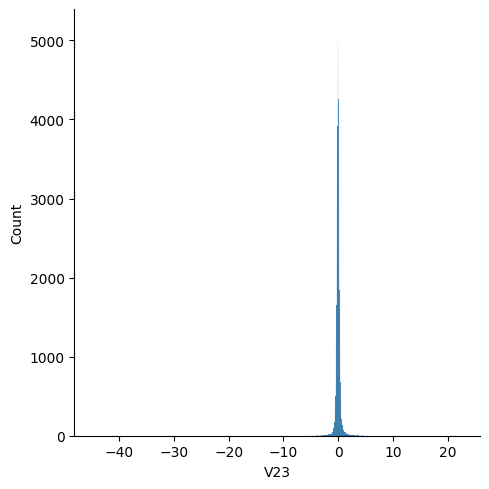

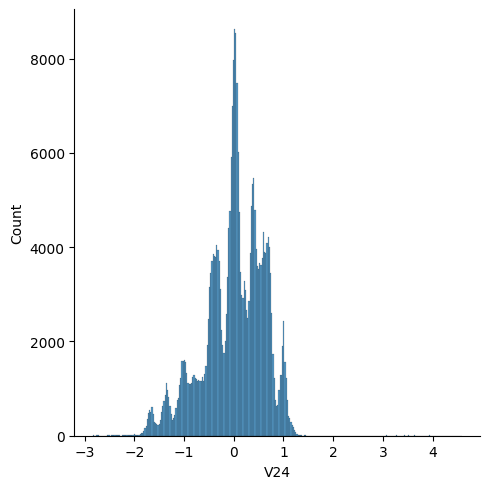

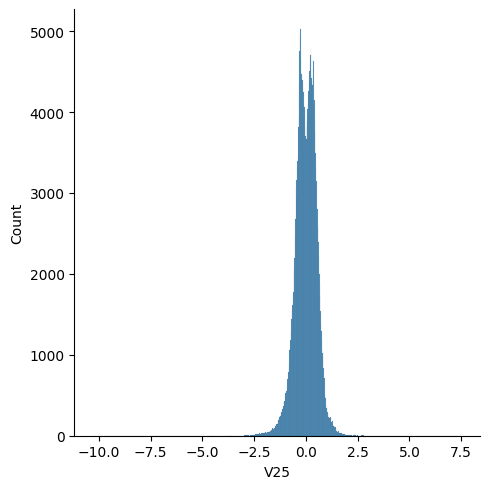

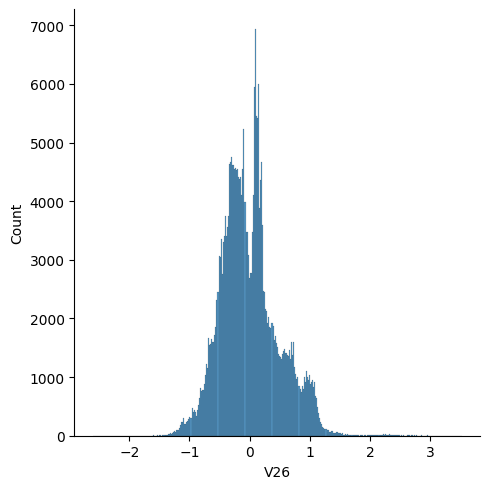

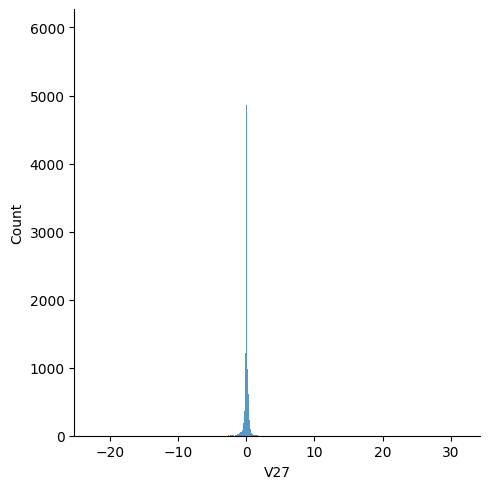

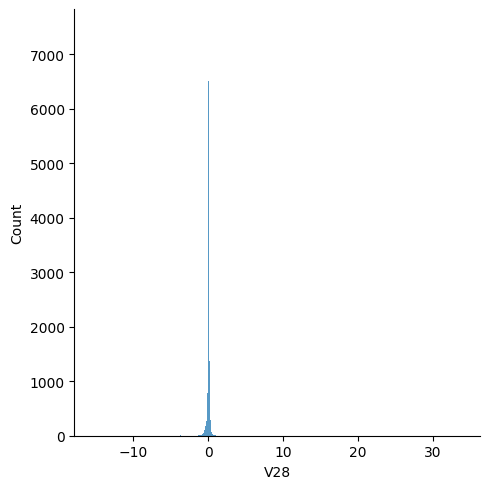

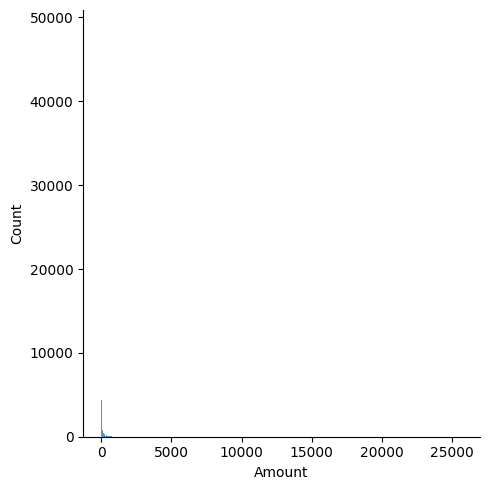

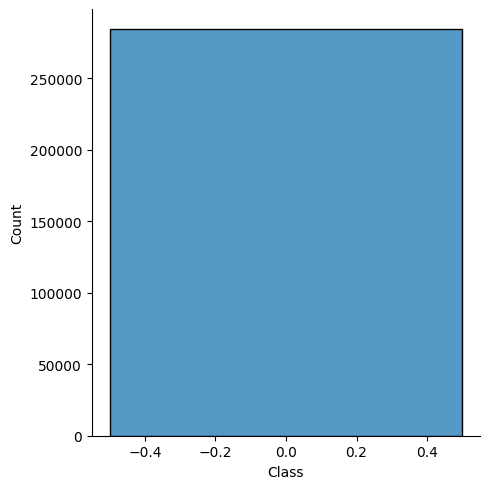

In [23]:
#investigating the distribution of data in fraudulent category
for col in legit_transaction:
    print(col)
    print(skew(legit_transaction[col]))
    plt.figure
    sns.displot(legit_transaction[col])
    plt.show

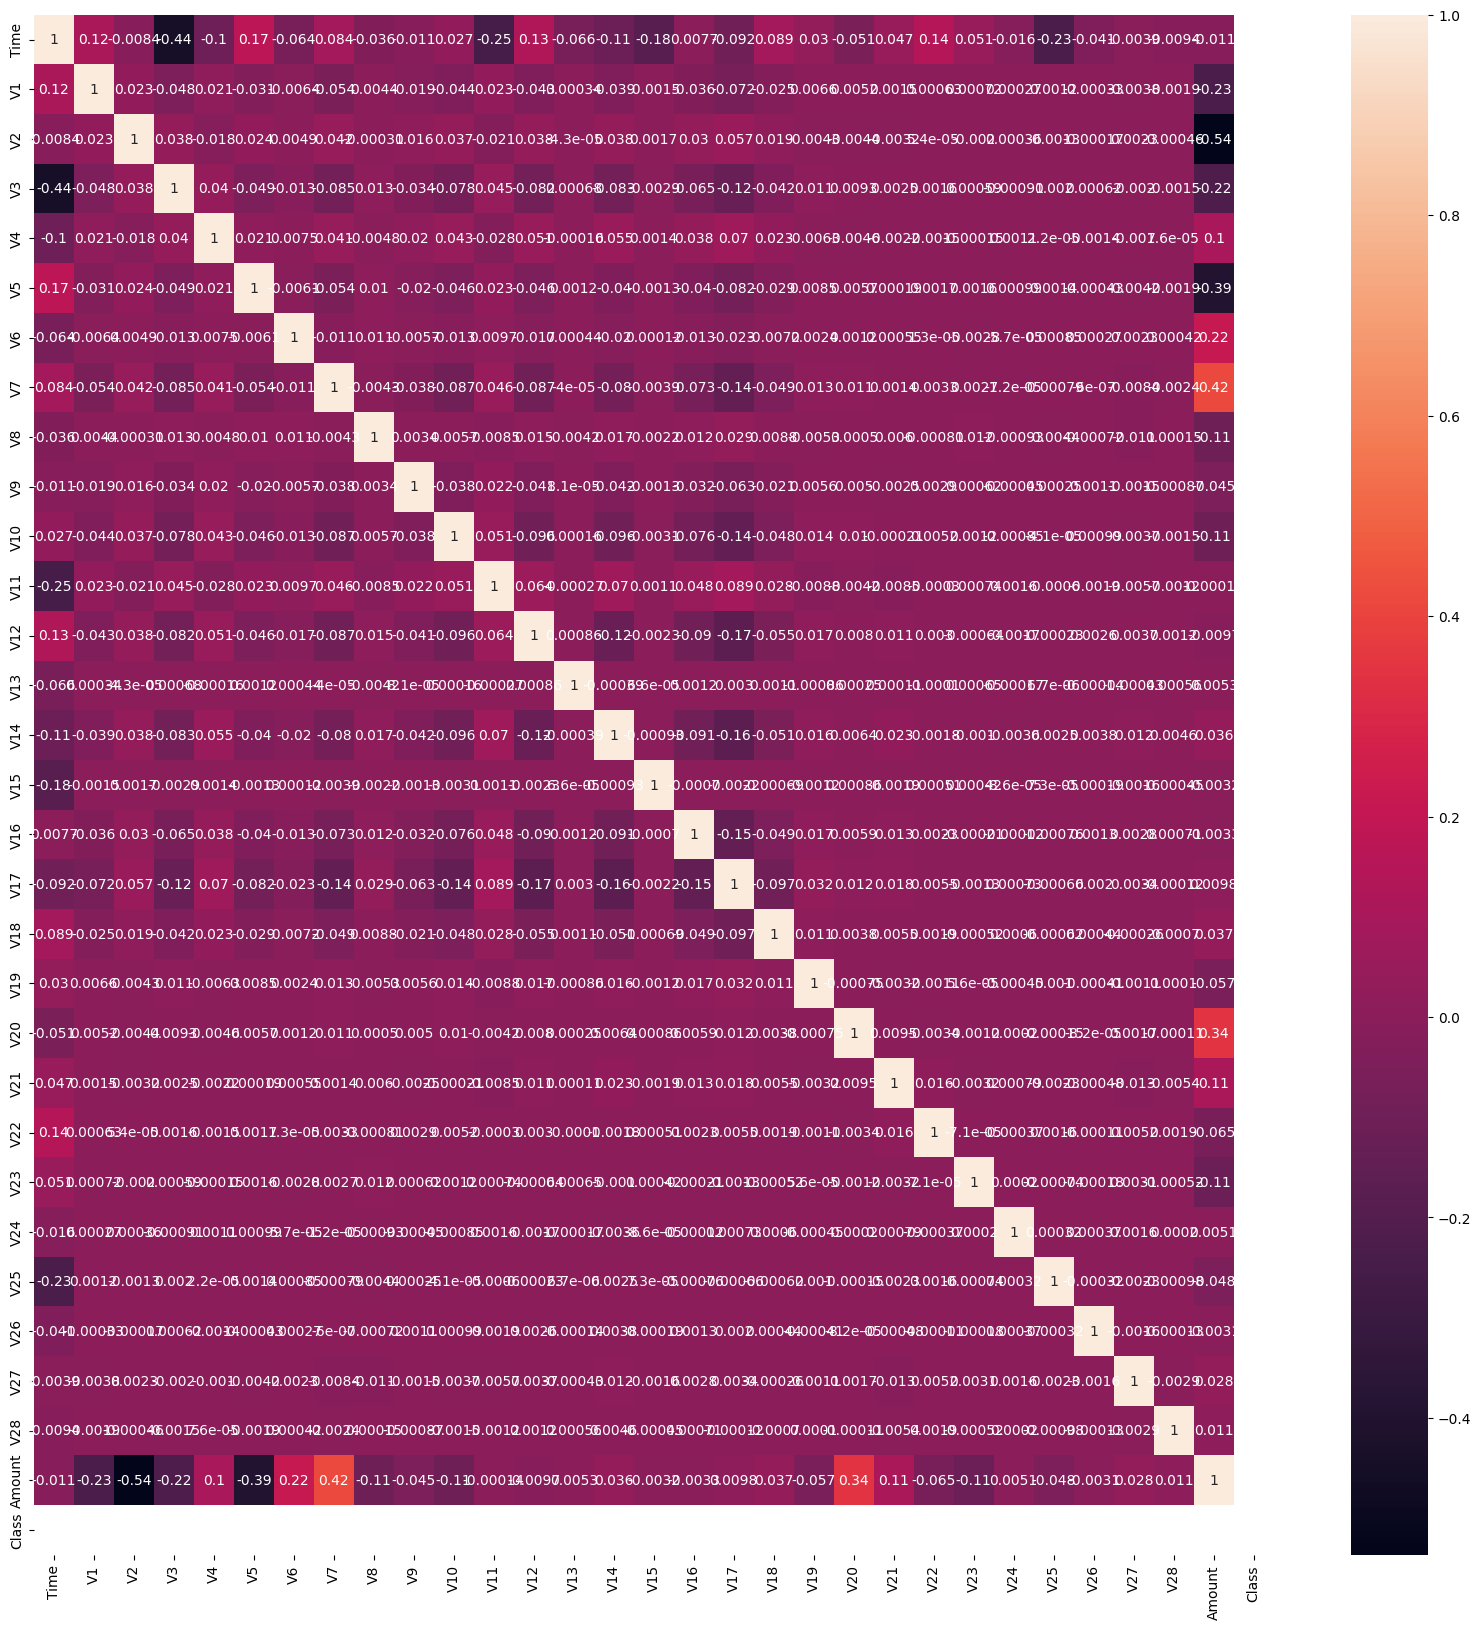

In [24]:
#correlation heatmap

fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(legit_transaction.corr(), annot=True)
plt.show()

In [25]:
legit_transaction.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
legit_transaction['Amount'].skew()

17.00314710107444

In [27]:
legit_transaction['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [28]:
legit_transaction['Amount']**(1/4)

0         3.497417
1         1.280672
2         4.411257
3         3.333625
4         2.892404
            ...   
284802    0.936748
284803    2.231357
284804    2.870354
284805    1.778279
284806    3.838088
Name: Amount, Length: 284315, dtype: float64

In [29]:
legit_transaction['Amount']=legit_transaction['Amount']**(1/4)

In [30]:
legit_transaction.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,3.497417,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.280672,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.411257,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,3.333625,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,2.892404,0


In [31]:
legit_transaction['Amount'].skew()

0.9663390438070187

In [32]:
legit_transaction.shape

(284315, 31)

In [33]:
#correcting the unbalanced data in the legit class sice it is too much compared with the fraudulent class (UNDERSAMPLING METHOD)
legit_transaction=legit_transaction.sample(n=492)

In [34]:
legit_transaction.shape

(492, 31)

In [35]:
#concatenate the two dataframe
transactions=pd.concat([legit_transaction,fraudulent_transaction],axis=0)

In [36]:
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
73006,54938.0,1.475186,-1.335478,0.922570,-1.419191,-1.661747,0.431272,-1.682058,0.216229,-1.254140,...,-0.245911,-0.152239,-0.046463,-0.505653,0.333590,-0.161156,0.075835,0.013557,1.741594,0
117965,74891.0,1.165028,0.201798,0.592058,0.780150,-0.668519,-1.317703,0.215984,-0.300672,-0.093172,...,-0.142600,-0.452983,0.111280,0.939141,0.251736,0.135247,-0.037482,0.027425,2.440940,0
103926,68854.0,1.237841,0.317762,-0.054927,0.736961,0.658922,0.735363,-0.007099,0.115010,-0.378432,...,-0.049270,-0.051351,-0.184739,-1.325933,0.658010,-0.330488,0.040376,0.001277,1.495349,0
89735,62703.0,-2.047166,-0.807672,1.973582,-0.659650,0.108473,-1.282183,-0.783282,0.568083,0.162704,...,0.207721,0.003342,-0.092595,0.482940,-0.163360,0.821685,-0.082705,-0.194523,2.236068,0
30141,35792.0,-0.152961,-0.291129,1.895620,-1.583095,-1.382263,-0.581882,-0.261532,-0.145801,-2.581190,...,-0.239654,-0.388426,0.131437,0.355920,-0.420172,-0.356411,0.145138,0.136601,2.735565,0


In [37]:
transactions.shape

(984, 31)

In [38]:
transactions.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95535.367886,-0.026391,-0.035130,-0.016665,-0.043082,0.011670,-0.023161,-0.064689,-0.005578,0.002704,...,0.001347,-0.069923,-0.061320,-0.079051,0.026963,0.011804,0.027277,-0.005621,0.043798,2.294560
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,7.182149


In [39]:
#splitting data into predictants(X) and target(y)
X=transactions.drop(columns='Class',axis=1)
Y=transactions['Class']

In [40]:
#Seperating data into train and test
#stratify=Y evenly distributes the two classes(0 and 1) into the train and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, stratify=Y,random_state=2)

In [41]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [42]:
#Model Training using Logistic Regression
model=LogisticRegression()

In [43]:
#Training the Logistic Regression with training data
model.fit(X_train,Y_train)

LogisticRegression()

In [44]:
#model evaluation
#find ACCURACY score 

#find ACCURACY score on train data first to see if it learn well
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)


In [45]:
print('Accuracy on Training data:',training_data_accuracy)

Accuracy on Training data: 0.96569250317662


In [46]:
#find ACCURACY score on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [47]:
print('Accuracy on Test data:',test_data_accuracy)

Accuracy on Test data: 0.9238578680203046
